In [3]:
pip install -iu spacy

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: u


ERROR: Could not find a version that satisfies the requirement spacy (from versions: none)
ERROR: No matching distribution found for spacy

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
df.head()

In [ ]:
df.head()

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('data/fake_job_postings.csv')

In [12]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [13]:
df.shape

(17880, 18)

In [14]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [17]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
df.fillna('',inplace=True)

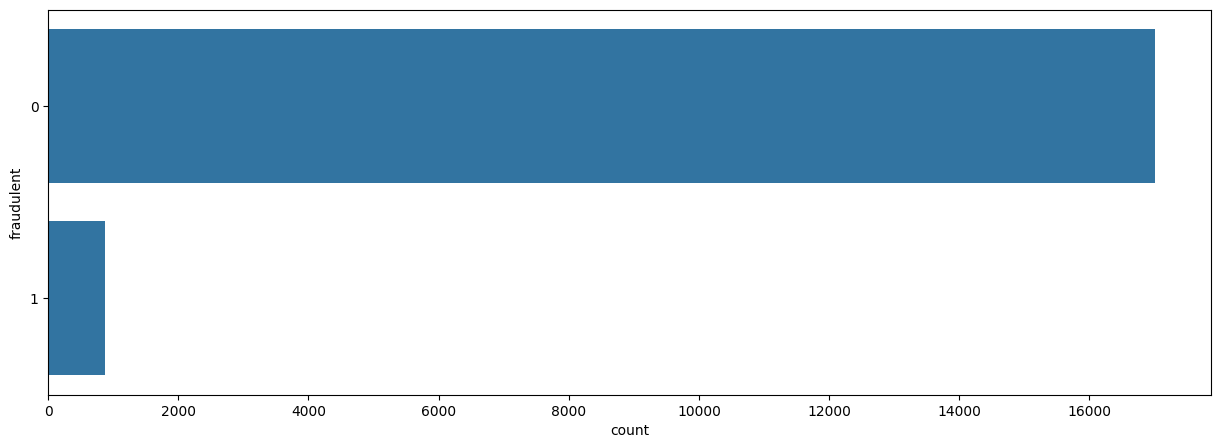

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent', data=df)
plt.show()

In [27]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [30]:
exp = dict(df['required_experience'].value_counts())
if '' in exp:
    del exp['']
print(exp)

{'Mid-Senior level': 3809, 'Entry level': 2697, 'Associate': 2297, 'Not Applicable': 1116, 'Director': 389, 'Internship': 381, 'Executive': 141}


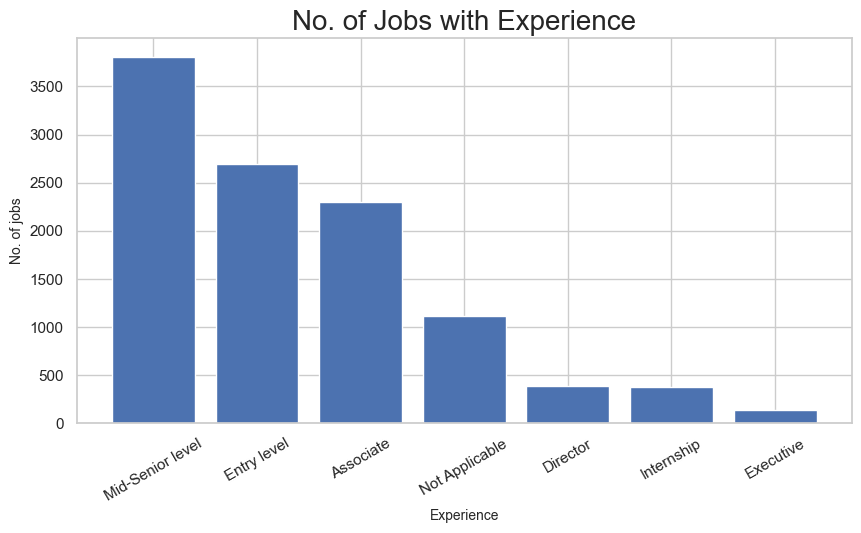

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title('No. of Jobs with Experience', size=20)
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)  # Corrected line
plt.xticks(rotation=30)
plt.show()

In [34]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [35]:
def split(location):
    l=location.split(',')
    return l[0]
df['country']=df.location.apply(split)

In [36]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [38]:
countr=dict(df.country.value_counts():[14])
del countr['']
countr

SyntaxError: invalid syntax (3353194328.py, line 1)

In [39]:
countr = dict(df['country'].value_counts())
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80,
 'HK': 77,
 'PL': 76,
 'EE': 72,
 'IL': 72,
 'FR': 70,
 'ES': 66,
 'AE': 54,
 'EG': 52,
 'SE': 49,
 'RO': 46,
 'DK': 42,
 'ZA': 40,
 'BR': 36,
 'IT': 31,
 'FI': 29,
 'PK': 27,
 'LT': 23,
 'MY': 21,
 'QA': 21,
 'JP': 20,
 'RU': 20,
 'MX': 18,
 'PT': 18,
 'BG': 17,
 'TR': 17,
 'CN': 15,
 'CH': 15,
 'SA': 15,
 'MU': 14,
 'HU': 14,
 'AT': 14,
 'ID': 13,
 'MT': 13,
 'UA': 13,
 'CY': 11,
 'IQ': 10,
 'KR': 10,
 'TH': 10,
 'NG': 10,
 'AR': 9,
 'LU': 9,
 'BH': 9,
 'BY': 9,
 'PA': 9,
 'NO': 8,
 'RS': 7,
 'KE': 7,
 'CZ': 6,
 'LV': 6,
 'VN': 4,
 'NI': 4,
 'TT': 4,
 'TW': 4,
 'VI': 3,
 'KW': 2,
 'TN': 2,
 'AM': 2,
 'IS': 2,
 'LK': 2,
 'SK': 2,
 'CL': 2,
 'ZM': 2,
 'BD': 2,
 'HR': 1,
 'JM': 1,
 'KZ': 1,
 'SV': 1,
 'CM': 1,
 'PE': 1,
 'AL': 1,
 'GH': 1,
 'MA': 1,
 'SI': 1,
 'CO': 1,
 'SD': 1,
 'UG': 1,
 'KH': 1}

In [41]:
countr = dict(df['country'].value_counts()[:14])
del countr['']
countr

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/fake_job_postings.csv')

if 'location' in df.columns:
    def split(location):
        l = location.split(',')
        return l[0]

    df['country'] = df['location'].apply(split)
    country_counts = df['country'].value_counts()

    plt.figure(figsize=(8, 6))
    country_counts.plot(kind='bar', color='skyblue')
    plt.title('Country Distribution (Bar Chart)')
    plt.xlabel('Country')
    plt.ylabel('Number of Occurrences')
    plt.show()

    plt.figure(figsize=(8, 6))
    country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Country Distribution (Pie Chart)')
    plt.ylabel('')
    plt.show()


AttributeError: 'float' object has no attribute 'split'